In [ ]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
import os 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/

/content/gdrive


In [ ]:
cd MyDrive/

/content/gdrive/MyDrive


In [ ]:
cd dsai/

/content/gdrive/MyDrive/dsai


In [ ]:
ls

 joined_p_log_file.csv   product_quality_log.csv  'Task 3 Description.pdf'
 production_log.csv      task3_dataset.zip         vibrationdata/


In [ ]:
from zipfile import ZipFile
file_name = "/content/gdrive/MyDrive/dsai/task3_dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
pwd

'/content/gdrive/MyDrive/dsai'

In [ ]:
ls

 production_log.csv        task3_dataset.zip         vibrationdata/
 product_quality_log.csv  'Task 3 Description.pdf'


In [ ]:
path_p_log=r'/content/gdrive/MyDrive/dsai/'
filename='production_log.csv'
p_log=pd.read_csv(os.path.join(path_p_log, filename),sep=',')

In [ ]:
p_log.drop(p_log.columns[0],axis=1)

,timestamp,product_id
0,2021-05-17_08-12-48,P3.2.500
1,2021-05-17_08-12-51,P3.2.501
2,2021-05-17_08-12-54,P3.2.502
3,2021-05-17_08-12-57,P3.2.503
4,2021-05-17_08-13-00,P3.2.504
...,...,...
1651,2021-05-17_09-35-21,P3.2.2151
1652,2021-05-17_09-35-24,P3.2.2152
1653,2021-05-17_09-35-27,P3.2.2153
1654,2021-05-17_09-35-30,P3.2.2154


In [ ]:
filename='product_quality_log.csv'
p_q_log=pd.read_csv(os.path.join(path_p_log, filename),sep=',')

In [ ]:
p_q_log.drop(p_q_log.columns[0],axis=1)

,machine_id,product_id,quality
0,Printer F0815,P3.2.500,OK
1,Printer F0815,P3.2.501,OK
2,Printer F0815,P3.2.502,OK
3,Printer F0815,P3.2.503,OK
4,Printer F0815,P3.2.504,OK
...,...,...,...
1651,Printer F0815,P3.2.2151,nOK
1652,Printer F0815,P3.2.2152,nOK
1653,Printer F0815,P3.2.2153,nOK
1654,Printer F0815,P3.2.2154,nOK


In [ ]:
p_q_join_final=pd.merge(p_log, p_q_log, on='product_id', how='left').dropna()
p_q_join_final["quality_label"] = pd.np.where(p_q_join_final.quality.str.match("OK"),1,0)
p_q_join_final=p_q_join_final.drop(p_q_join_final.columns[[0,3,5]],axis=1)   
p_q_join_final 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


,timestamp,product_id,machine_id,quality_label
0,2021-05-17_08-12-48,P3.2.500,Printer F0815,1
1,2021-05-17_08-12-51,P3.2.501,Printer F0815,1
2,2021-05-17_08-12-54,P3.2.502,Printer F0815,1
3,2021-05-17_08-12-57,P3.2.503,Printer F0815,1
4,2021-05-17_08-13-00,P3.2.504,Printer F0815,1
...,...,...,...,...
1651,2021-05-17_09-35-21,P3.2.2151,Printer F0815,0
1652,2021-05-17_09-35-24,P3.2.2152,Printer F0815,0
1653,2021-05-17_09-35-27,P3.2.2153,Printer F0815,0
1654,2021-05-17_09-35-30,P3.2.2154,Printer F0815,0


In [ ]:
#p_q_join_final.to_csv(r'/content/gdrive/MyDrive/dsai/joined_p_log_file.csv', header=True)

In [ ]:
#cd vibrationdata/

/content/gdrive/MyDrive/dsai/vibrationdata


In [ ]:
path=r'/content/gdrive/MyDrive/dsai/vibrationdata'

In [ ]:
filename = '2021-05-17_08-12-48'
dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

In [ ]:
dataset

,0,1
0,-0.168,-0.164
1,-0.171,-0.227
2,-0.242,-0.154
3,-0.139,-0.176
4,-0.081,-0.110
...,...,...
20475,-0.061,0.017
20476,-0.183,-0.056
20477,-0.029,0.056
20478,0.027,-0.098


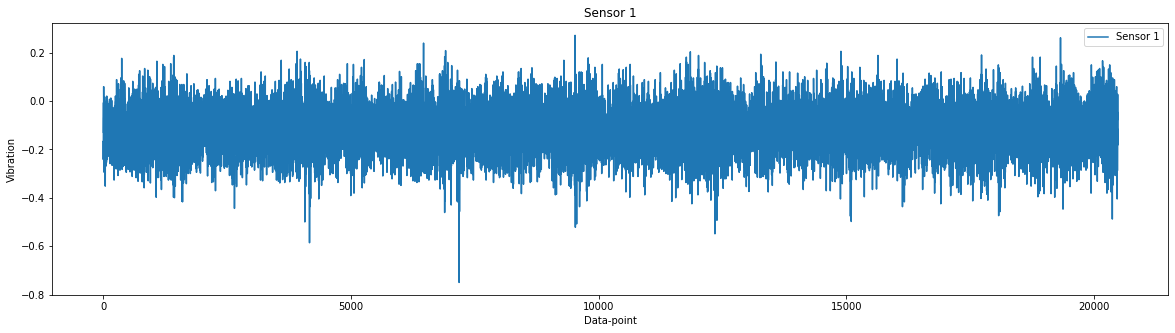

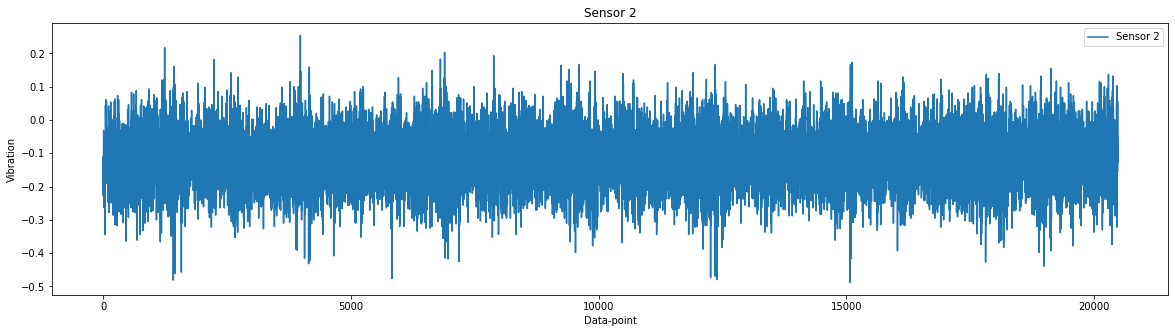

In [ ]:
for i in [0,1]:
    
    df_sensor=np.array(dataset.iloc[:,i])
    
    plt.figure(figsize=(20, 5))
    plt.plot(df_sensor)

    plt.legend(['Sensor {}'.format(i+1)])

    plt.xlabel("Data-point")
    plt.ylabel("Vibration")
    plt.title('Sensor {}'.format(i+1))
    plt.show()

In [ ]:
temp = sensor_data
temp

array([-0.168, -0.171, -0.242, ..., -0.029,  0.027, -0.076])

In [ ]:
# extracting features from this sensor data

feature_matrix=np.zeros((1,9))
feature_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
def compute_skewness(x):
    
    n = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / n
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3

In [ ]:
def compute_kurtosis(x):
    
    n = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / n
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3

In [ ]:
#sensor_no=2 # Provide the sensor number [1,2] of the Test set
def Time_feature_matrix(sensor_no):
  Time_feature_matrix=pd.DataFrame()
  path=r'/content/gdrive/MyDrive/dsai/vibrationdata'
  for filename in os.listdir(path):
    
      dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

      sensor_data = np.array(dataset.iloc[:,sensor_no-1])

      feature_matrix=np.zeros((1,9))
      temp = sensor_data
      feature_matrix[0,0] = np.max(temp)
      feature_matrix[0,1] = np.min(temp)
      feature_matrix[0,2] = np.mean(temp)
      feature_matrix[0,3] = np.std(temp, ddof = 1)
      feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
      feature_matrix[0,5] = compute_skewness(temp)
      feature_matrix[0,6] = compute_kurtosis(temp)
      feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
      feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
      df = pd.DataFrame(feature_matrix)
      df['timestamp'] = filename
      df.index=[filename]
    
      Time_feature_matrix = Time_feature_matrix.append(df)
  Time_feature_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor','timestamp']
  Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index, format='%Y-%m-%d_%H-%M-%S')
  Time_feature_matrix = Time_feature_matrix.sort_index()
  return Time_feature_matrix

In [ ]:

for i in range(2):
  globals()['df' + str(i+1)]=Time_feature_matrix(i+1)
  globals()['df' + str(i+1) + '_merged']=pd.merge(globals()['df' + str(i+1)], p_q_join_final, on='timestamp', how='left').dropna()
  globals()['df' + str(i+1) + '_merged']=globals()['df' + str(i+1) + '_merged'].drop(globals()['df' + str(i+1) + '_merged'].columns[9:12],axis=1)
  

In [ ]:
df1

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,timestamp
2021-05-17 08:12:48,0.271,-0.750,-0.117538,0.092807,0.149760,-0.065398,0.254885,1.809563,-1.274137,2021-05-17_08-12-48
2021-05-17 08:12:51,0.269,-0.620,-0.116943,0.093839,0.149936,-0.097518,0.185511,1.794095,-1.282135,2021-05-17_08-12-51
2021-05-17 08:12:54,0.278,-0.540,-0.117447,0.094562,0.150782,-0.037262,0.124868,1.843723,-1.283833,2021-05-17_08-12-54
2021-05-17 08:12:57,0.273,-0.742,-0.116196,0.094652,0.149867,-0.083470,0.204953,1.821614,-1.289774,2021-05-17_08-12-57
2021-05-17 08:13:00,0.305,-0.632,-0.116490,0.094036,0.149707,-0.078106,0.257352,2.037312,-1.285148,2021-05-17_08-13-00
...,...,...,...,...,...,...,...,...,...,...
2021-05-17 09:35:21,0.466,-0.732,-0.117700,0.145685,0.187287,-0.083947,0.325875,2.488160,-1.591222,2021-05-17_09-35-21
2021-05-17 09:35:24,0.518,-0.781,-0.116901,0.146956,0.187779,-0.067323,0.332488,2.758560,-1.606308,2021-05-17_09-35-24
2021-05-17 09:35:27,0.547,-0.776,-0.116428,0.164493,0.201525,0.035610,0.176369,2.714309,-1.730891,2021-05-17_09-35-27
2021-05-17 09:35:30,0.728,-0.869,-0.118304,0.170994,0.207927,0.045444,0.367062,3.501234,-1.757559,2021-05-17_09-35-30


In [ ]:
df2

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,timestamp
2021-05-17 08:12:48,0.254,-0.488,-0.116659,0.079494,0.141168,-0.049798,0.334893,1.799275,-1.210090,2021-05-17_08-12-48
2021-05-17 08:12:51,0.229,-0.505,-0.115859,0.079616,0.140576,-0.037515,0.304273,1.629010,-1.213338,2021-05-17_08-12-51
2021-05-17 08:12:54,0.276,-0.496,-0.117435,0.081349,0.142858,-0.040618,0.286398,1.931991,-1.216483,2021-05-17_08-12-54
2021-05-17 08:12:57,0.234,-0.569,-0.116182,0.080029,0.141077,-0.031668,0.348241,1.658674,-1.214271,2021-05-17_08-12-57
2021-05-17 08:13:00,0.239,-0.483,-0.116388,0.079940,0.141196,-0.027321,0.280894,1.692688,-1.213147,2021-05-17_08-13-00
...,...,...,...,...,...,...,...,...,...,...
2021-05-17 09:35:21,0.388,-0.620,-0.117854,0.117771,0.166610,0.135187,0.437248,2.328791,-1.413700,2021-05-17_09-35-21
2021-05-17 09:35:24,0.488,-0.598,-0.117200,0.117993,0.166306,0.154388,0.402511,2.934349,-1.418989,2021-05-17_09-35-24
2021-05-17 09:35:27,0.496,-0.830,-0.116559,0.142499,0.184095,-0.038668,0.532902,2.694264,-1.579417,2021-05-17_09-35-27
2021-05-17 09:35:30,0.552,-0.791,-0.118188,0.150242,0.191155,-0.023059,0.585151,2.887714,-1.617372,2021-05-17_09-35-30


In [ ]:
df1.columns

Index(['Max', 'Min', 'Mean', 'Std', 'RMS', 'Skewness', 'Kurtosis',
       'Crest Factor', 'Form Factor', 'timestamp'],
      dtype='object')

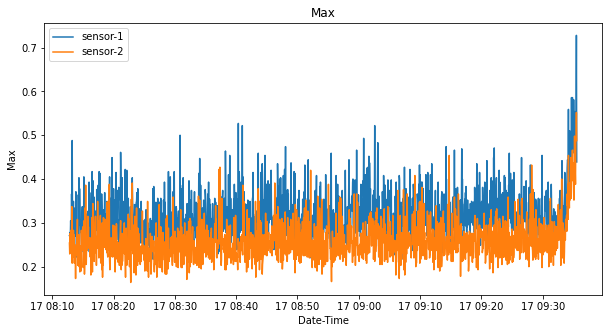

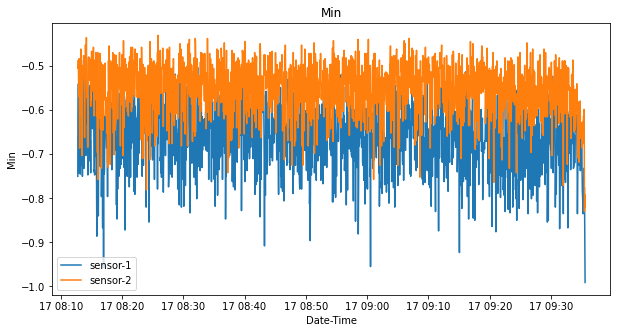

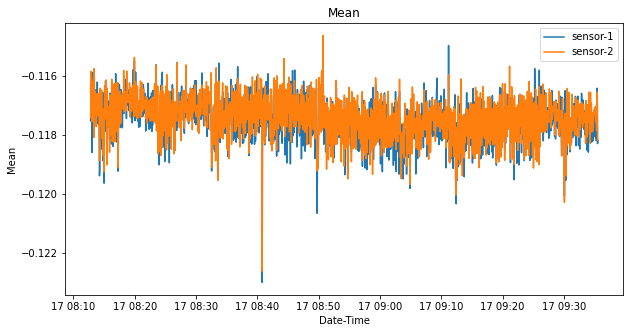

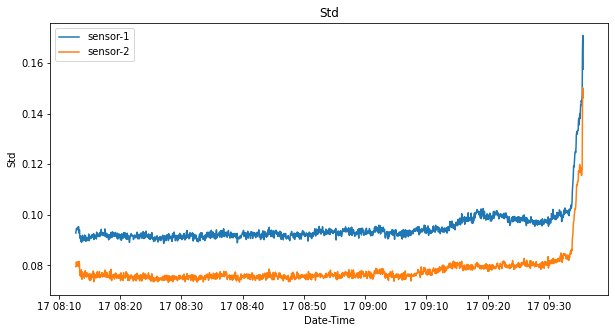

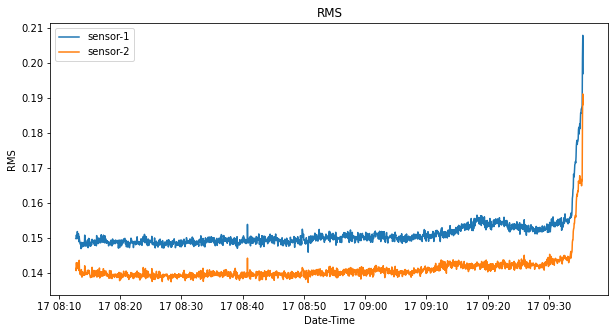

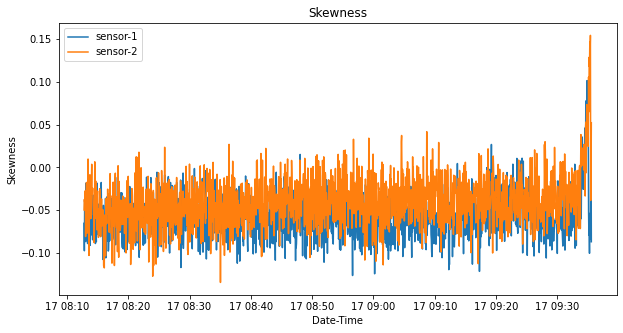

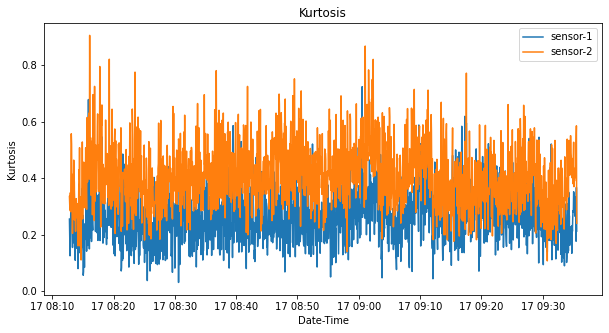

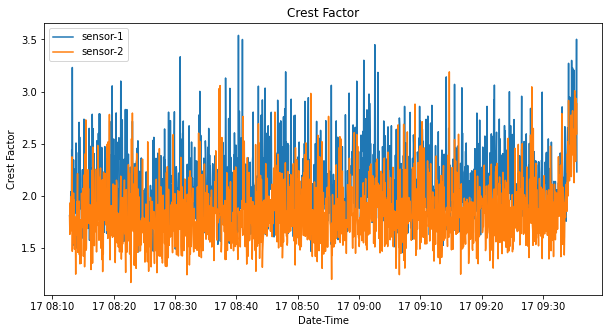

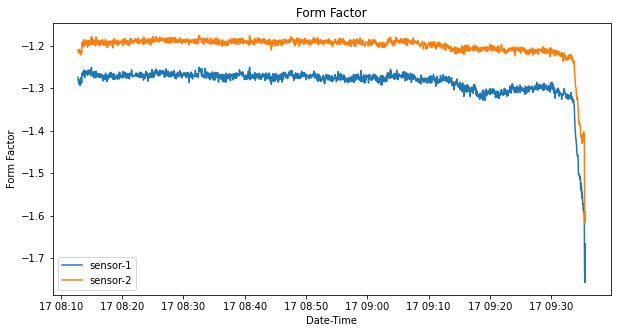

In [ ]:
for col in (df1.columns[:-1]):  
    
        plt.figure(figsize=(10, 5))
        plt.plot(df1.index,df1[col])
        plt.plot(df1.index,df2[col])

        plt.legend(['sensor-1','sensor-2'])

        plt.xlabel("Date-Time")
        plt.ylabel(col)
        plt.title(col)
        plt.show()

In [ ]:
df1_merged


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,quality_label
0,0.271,-0.750,-0.117538,0.092807,0.149760,-0.065398,0.254885,1.809563,-1.274137,1
1,0.269,-0.620,-0.116943,0.093839,0.149936,-0.097518,0.185511,1.794095,-1.282135,1
2,0.278,-0.540,-0.117447,0.094562,0.150782,-0.037262,0.124868,1.843723,-1.283833,1
3,0.273,-0.742,-0.116196,0.094652,0.149867,-0.083470,0.204953,1.821614,-1.289774,1
4,0.305,-0.632,-0.116490,0.094036,0.149707,-0.078106,0.257352,2.037312,-1.285148,1
...,...,...,...,...,...,...,...,...,...,...
1651,0.466,-0.732,-0.117700,0.145685,0.187287,-0.083947,0.325875,2.488160,-1.591222,0
1652,0.518,-0.781,-0.116901,0.146956,0.187779,-0.067323,0.332488,2.758560,-1.606308,0
1653,0.547,-0.776,-0.116428,0.164493,0.201525,0.035610,0.176369,2.714309,-1.730891,0
1654,0.728,-0.869,-0.118304,0.170994,0.207927,0.045444,0.367062,3.501234,-1.757559,0


In [ ]:
df2_merged

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,quality_label
0,0.254,-0.488,-0.116659,0.079494,0.141168,-0.049798,0.334893,1.799275,-1.210090,1
1,0.229,-0.505,-0.115859,0.079616,0.140576,-0.037515,0.304273,1.629010,-1.213338,1
2,0.276,-0.496,-0.117435,0.081349,0.142858,-0.040618,0.286398,1.931991,-1.216483,1
3,0.234,-0.569,-0.116182,0.080029,0.141077,-0.031668,0.348241,1.658674,-1.214271,1
4,0.239,-0.483,-0.116388,0.079940,0.141196,-0.027321,0.280894,1.692688,-1.213147,1
...,...,...,...,...,...,...,...,...,...,...
1651,0.388,-0.620,-0.117854,0.117771,0.166610,0.135187,0.437248,2.328791,-1.413700,0
1652,0.488,-0.598,-0.117200,0.117993,0.166306,0.154388,0.402511,2.934349,-1.418989,0
1653,0.496,-0.830,-0.116559,0.142499,0.184095,-0.038668,0.532902,2.694264,-1.579417,0
1654,0.552,-0.791,-0.118188,0.150242,0.191155,-0.023059,0.585151,2.887714,-1.617372,0


In [ ]:
final_merged_both=pd.concat([df1_merged, df2_merged])

In [ ]:
final_merged_both

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,quality_label
0,0.271,-0.750,-0.117538,0.092807,0.149760,-0.065398,0.254885,1.809563,-1.274137,1
1,0.269,-0.620,-0.116943,0.093839,0.149936,-0.097518,0.185511,1.794095,-1.282135,1
2,0.278,-0.540,-0.117447,0.094562,0.150782,-0.037262,0.124868,1.843723,-1.283833,1
3,0.273,-0.742,-0.116196,0.094652,0.149867,-0.083470,0.204953,1.821614,-1.289774,1
4,0.305,-0.632,-0.116490,0.094036,0.149707,-0.078106,0.257352,2.037312,-1.285148,1
...,...,...,...,...,...,...,...,...,...,...
1651,0.388,-0.620,-0.117854,0.117771,0.166610,0.135187,0.437248,2.328791,-1.413700,0
1652,0.488,-0.598,-0.117200,0.117993,0.166306,0.154388,0.402511,2.934349,-1.418989,0
1653,0.496,-0.830,-0.116559,0.142499,0.184095,-0.038668,0.532902,2.694264,-1.579417,0
1654,0.552,-0.791,-0.118188,0.150242,0.191155,-0.023059,0.585151,2.887714,-1.617372,0


In [ ]:
X = final_merged_both.iloc[:, 0:9].values
y = final_merged_both.iloc[:, 9].values

In [ ]:
X = df1_merged.iloc[:, 0:9].values
y = df1_merged.iloc[:, 9].values

In [ ]:
X

array([[ 0.271     , -0.75      , -0.11753828, ...,  0.25488474,
         1.809563  , -1.27413735],
       [ 0.269     , -0.62      , -0.11694268, ...,  0.18551069,
         1.79409503, -1.28213516],
       [ 0.278     , -0.54      , -0.11744658, ...,  0.12486815,
         1.8437234 , -1.28383333],
       ...,
       [ 0.547     , -0.776     , -0.11642822, ...,  0.1763688 ,
         2.71430897, -1.73089123],
       [ 0.728     , -0.869     , -0.11830425, ...,  0.36706193,
         3.50123404, -1.75755894],
       [ 0.439     , -0.991     , -0.11820986, ...,  0.21215437,
         2.22855348, -1.66643257]])

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=30, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
y_pred=np.rint(y_pred)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cf_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[  5  11]
 [  4 312]]
              precision    recall  f1-score   support

           0       0.56      0.31      0.40        16
           1       0.97      0.99      0.98       316

    accuracy                           0.95       332
   macro avg       0.76      0.65      0.69       332
weighted avg       0.95      0.95      0.95       332

0.9548192771084337


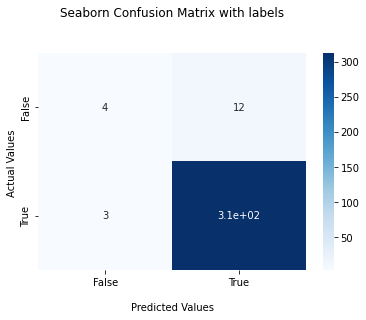

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

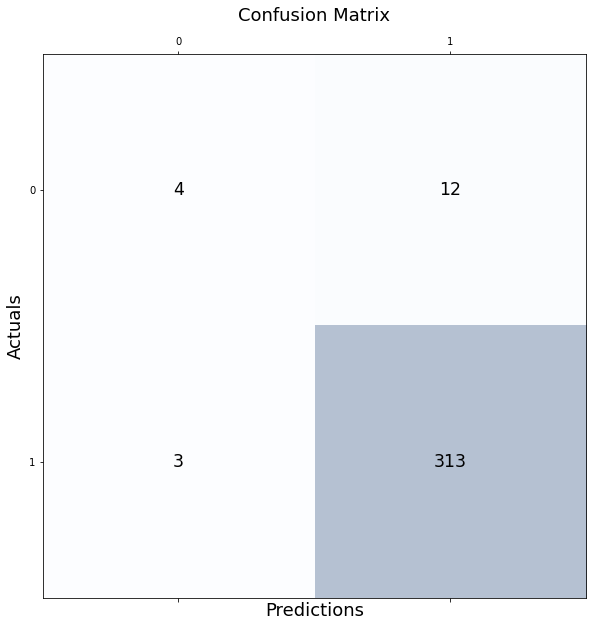

In [ ]:
# Print the confusion matrix using Matplotlib
#

fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(cf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
        ax.text(x=j, y=i,s=cf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals',fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

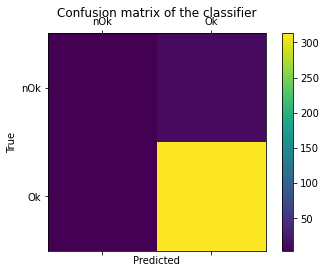

In [ ]:
labels=['nOk','Ok']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cf_matrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()